In [112]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Problem 1

In [113]:
#Import the orders dataset from CSV
orders = pd.read_csv('Orders.csv')

In [114]:
#View the DF
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [115]:
#Change profit to numeric
orders['Profit'] = pd.to_numeric(orders['Profit'].str.replace("$", "").str.replace(",", ""))

In [116]:
#Change sales to numeric
orders['Sales'] = pd.to_numeric(orders['Sales'].str.replace("$", "").str.replace(",", ""))

## Problem 2

In [117]:
#Convert Order.Date and Ship.Date to datetime objects
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [118]:
#Create Order, Shipment month and year columns
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Order.Year'] = orders['Order.Date'].dt.year
orders['Ship.Month'] = orders['Ship.Date'].dt.month
orders['Ship.Year'] = orders['Ship.Date'].dt.year

In [119]:
orders2 = orders.copy()

In [120]:
#Group categories vs time (month)
CategoryByYear = pd.DataFrame(orders2.groupby('Sub.Category')['Quantity'].sum())
CategoryByYear
orders2 = orders2.merge(CategoryByYear, how='inner', on='Sub.Category')
orders2['Quantity'] = orders2['Quantity_x']
orders2['YearQuantity'] = orders2['Quantity_y']
orders2 = orders2.drop(['Quantity_x', 'Quantity_y'], axis=1)


In [121]:
#Make a new dataframe containing category, month, and percent of sales sold in that month
OrdersByCategoryMonth = orders2.groupby(['Sub.Category', 'Order.Month'])['Quantity'].sum()
OrdersByCategoryYear = orders2.groupby(['Sub.Category', 'Order.Month'])['YearQuantity'].mean()
OrdersByCategoryMonth
OrdersByCategoryYear
OrdersByCategoryPercentPerMonth = 100*OrdersByCategoryMonth/OrdersByCategoryYear


In [122]:
#Convert data from previous cell into a dataframe that can be used in plotting functions
ordersX = pd.DataFrame(OrdersByCategoryPercentPerMonth)
ordersX = ordersX.reset_index()
ordersX

,Sub.Category,Order.Month,0
0,Accessories,1,4.092819
1,Accessories,2,4.823680
2,Accessories,3,5.317011
3,Accessories,4,5.846885
4,Accessories,5,7.144162
5,Accessories,6,9.683903
6,Accessories,7,6.669103
7,Accessories,8,10.122419
8,Accessories,9,11.273525
9,Accessories,10,8.578476


In [123]:
%matplotlib inline
import seaborn as sns

C:\Users\Dave\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x720 with 0 Axes>

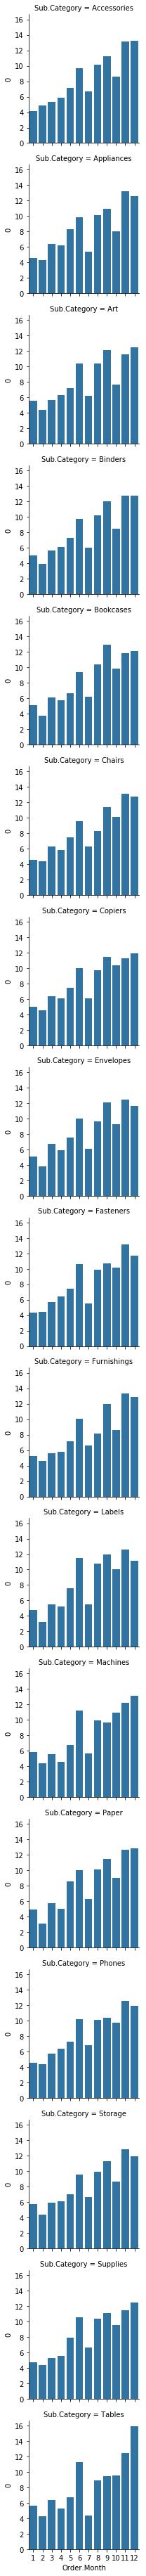

In [124]:
#Facet plot of month versus percent of sales sold that month, faceted by subcategory.
plt.figure(figsize=(20,10))
monthGrid = sns.FacetGrid(ordersX, row='Sub.Category')
monthGrid.map(sns.barplot, 'Order.Month', 0)






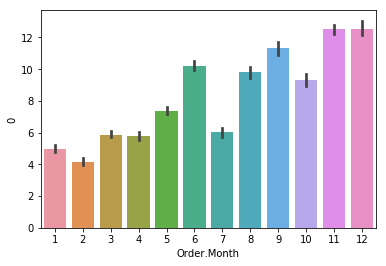

In [125]:
#This is the overall plot for all products by month
sns.barplot(data=ordersX, x='Order.Month', y=0)

## Problem 3
### 3.1 How much profit was lost due to returns?

In [126]:
#Problem 3-1: How much profit was lost due to returns?

#New copy of orders to use in this problem, and import of Returns
returns = pd.read_csv('Returns.csv')
returns['Order.ID'] = returns['Order ID'].copy()
returns = returns.drop('Order ID', axis=1)
orders3 = orders2.copy()

#Merge 
orders3 = orders3.merge(returns, on='Order.ID', how='outer')

In [127]:
orders3.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Ship.Month,Ship.Year,Quantity,YearQuantity,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,40.77,High,11,2014,11,2014,2,11870,NaN,NaN
1,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,25.27,High,11,2014,11,2014,2,8310,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,915.49,Medium,10,2014,10,2014,9,11870,NaN,NaN
3,25334,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,71.02,Medium,10,2014,10,2014,3,11870,NaN,NaN
4,25333,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5.98,Medium,10,2014,10,2014,6,9051,NaN,NaN


In [128]:
#How much profit was lost due to returns?
print("Sum of all years: " + str(np.sum(orders3.query('Returned == "Yes"')['Profit'])))

#$61,370 in profit was lost due to returns

print(np.sum(orders3.query('Returned == "Yes"').groupby('Order.Year')['Profit']))

#61,000 dollar in profit lost in total, with a breakdown by year:

Sum of all years: 61370.75
Order.Year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64


### 3.2 How many customers returned more than once? More than 5 times?

In [129]:
#How many customers returned more than once? More than 5 times?

#First, we need to remove duplicate "Order.ID's" for this problem, since one returned order should only count once
#Create subset DF containing only Order.ID, Customer.ID, Returned, and Region_y (a duplicate of region_x) to answer questions 2 and 3
orders4 = orders3[['Order.ID', 'Customer.ID', 'Returned', 'Region_y']]
orders4 = orders4.drop_duplicates()
orders4.shape


(25739, 4)

In [130]:
#How many customers returned more than once? More than 5 times?

orders4.query('Returned == "Yes"').groupby('Customer.ID')['Order.ID'].count().sort_values(ascending=False)

#Here, 20 customers made more then one return. No customer made more than 2 returns.  Possibly the question wanted to have each item in an order counts as 1, not whole orders. We can address this by looking at the entire DF

Customer.ID
JG-516095       2
ON-187151402    2
AM-10705120     2
AG-1049545      2
PR-1888027      2
TS-211607       2
PN-187751408    2
CA-12310139     2
JC-1577548      2
PK-190751406    2
SS-2059059      2
EH-139451404    2
AB-1016545      2
BD-162060       2
RH-1949559      2
BD-116201406    2
HG-14965120     2
CM-118151402    2
NC-185351404    2
BP-110951404    2
EH-1418518      1
EH-1412555      1
EH-141251404    1
EH-1418531      1
EH-14125120     1
EH-139907       1
ZD-2192548      1
EG-3900134      1
EH-137651406    1
EH-137651404    1
               ..
ML-1775593      1
MO-17950120     1
MO-178007       1
MO-1750016      1
MN-7935147      1
MN-1793548      1
MM-828033       1
MM-805560       1
MM-1805531      1
MM-1792045      1
MM-1726078      1
MM-172607       1
ML-8265103      1
ML-775533       1
ML-177557       1
MH-1811554      1
ML-1741039      1
ML-174101402    1
ML-1739559      1
ML-173951406    1
MK-790595       1
MJ-1774045      1
MJ-17740139     1
MH-745595       

In [131]:
ReturnedTotal = orders3.query('Returned == "Yes"').groupby('Customer.ID')['Order.ID'].count().sort_values(ascending=False)
print(ReturnedTotal)
print(len(ReturnedTotal[ReturnedTotal > 1]))
print(len(ReturnedTotal[ReturnedTotal > 5]))

#By this measure, 547 customers made more than 1 return; 46 customers made more than 5 returns, when individual items from orders are considered

Customer.ID
PO-1885082      13
JK-1609027      11
MY-1829582      10
TB-2140066      10
KH-165101404     9
SG-200801404     9
SN-1056095       8
PB-19210127      8
JP-1552045       8
AJ-1096031       8
HD-1478598       8
SS-2059059       8
BP-110951404     7
TC-2114555       7
BT-1139564       7
SC-202301404     7
DL-12925101      7
CS-1845134       7
AT-1073545       7
GK-14620101      7
GT-147101404     7
BM-1114055       7
JE-1561097       7
EH-137651404     7
DH-130751404     7
ES-1408018       7
LC-168701408     6
LS-1697518       6
PO-1885048       6
MR-1754564       6
                ..
JP-1552082       1
JM-156555        1
JM-155351406     1
JM-152657        1
JM-15265144      1
JK-562595        1
ZC-219101402     1
JK-1609048       1
KB-1660096       1
KB-631515        1
KC-162551406     1
KC-1625582       1
LA-678086        1
LA-1678051       1
LA-16780102      1
KW-1643545       1
KT-1646548       1
KN-6390117       1
KN-16705120      1
KN-1639082       1
KN-163901406     1


### 3.3 Which regions are most likely to return orders?

In [132]:
#Which regions are most likely to return orders?

#We can use the full, orders3 dataset to answer this question
OrderByRegion = orders3.groupby('Region_x')['Order.ID'].count().sort_values(ascending=False)
OrderReturnedByRegion = orders3.query('Returned == "Yes"').groupby('Region_x')['Order.ID'].count().sort_values(ascending=False)
print(OrderByRegion)
print(OrderReturnedByRegion)
                                                                                                            

Region_x
Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Order.ID, dtype: int64
Region_x
Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Carib

In [133]:
#Now, convert these numbers to a "percent returned" per region
RegionReturnPct = 100*OrderReturnedByRegion/OrderByRegion
print(RegionReturnPct.sort_values(ascending=False))

#We see a range of 2.4% (Eastern Africa) to 5.5% (Western US)

Region_x
Western US           5.526069
Eastern Asia         5.518113
Southern Europe      5.300521
Southern Africa      5.230126
Southern US          5.123457
Eastern US           4.705056
Southeastern Asia    4.474273
South America        4.451138
Western Asia         4.426230
Oceania              4.416404
Central America      4.415954
Southern Asia        4.180791
Central Asia         4.147465
Western Africa       4.109589
Caribbean            4.082840
North Africa         3.990610
Western Europe       3.960564
Canada               3.906250
Northern Europe      3.448276
Central US           3.185536
Eastern Europe       2.746893
Central Africa       2.643857
Eastern Africa       2.472527
Name: Order.ID, dtype: float64


### 3.4 Which categories (subcategories) or products are most likely to be returned?

In [134]:
#Similar proces, using Sub.Category instead of region

OrderByCategory = orders3.groupby('Sub.Category')['Order.ID'].count().sort_values(ascending=False)
OrderReturnedByCategory = orders3.query('Returned == "Yes"').groupby('Sub.Category')['Order.ID'].count().sort_values(ascending=False)
print(OrderByCategory)
print(OrderReturnedByCategory)

Sub.Category
Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Fasteners      2601
Labels         2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Order.ID, dtype: int64
Sub.Category
Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Copiers         99
Envelopes       99
Machines        63
Appliances      59
Tables          41
Name: Order.ID, dtype: int64


In [135]:
#Now, convert these numbers to a "percent returned" per category
CategoryReturnPct = 100*OrderReturnedByCategory/OrderByCategory
print(CategoryReturnPct.sort_values(ascending=False))

#Labels have the highest rate (5.3%). Appliances are the lowest (3.4%)

Sub.Category
Labels         5.267205
Tables         4.761905
Accessories    4.487805
Art            4.461349
Copiers        4.453441
Binders        4.376830
Phones         4.319333
Bookcases      4.313563
Paper          4.295533
Chairs         4.280722
Furnishings    4.280279
Supplies       4.279186
Machines       4.239569
Storage        4.198851
Envelopes      4.147465
Fasteners      3.921569
Appliances     3.386912
Name: Order.ID, dtype: float64


# Part 2: Machine Learning Case

## 4.1 Whether orders are returned or not

In [136]:
'''We have the orders3 DF, which is the orders DF merged with the returns DF, so we can use this. 
One slight issue is that "Region" replicated itself in both DFs, giving us Region_x and Region_y. Let's remove this.'''

OrdersMerged = orders3.copy()
OrdersMerged['Region'] = OrdersMerged['Region_x'].copy()
OrdersMerged = OrdersMerged.drop(['Region_x', 'Region_y'], axis=1)

In [137]:
#Check the value counts of Returned to get a sense of what was returned:
print(OrdersMerged['Returned'].value_counts())

'''Because the Returned column was formed from merging Returned (only a subset) with Orders, anything not returned is Na. 
Let's fix this, and replace with numerical 0, then switch "Yes" for 1 also.'''
OrdersMerged['Returned'] = OrdersMerged['Returned'].fillna(0)
OrdersMerged['Returned'] = OrdersMerged['Returned'].replace('Yes', 1)

Yes    2220
Name: Returned, dtype: int64


In [138]:
#Now we see a mean of 0.04 (4% were returned), and min of 0, max of 1, giving us a binary numerical variable.
OrdersMerged['Returned'].describe()

count    51290.000000
mean         0.043283
std          0.203496
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Returned, dtype: float64

## 4.2. Whether process time affects returns

In [139]:
#Generate an additional feature of Process.Time (days)
OrdersMerged['Process.Time'] = OrdersMerged['Ship.Date'] - OrdersMerged['Order.Date']
OrdersMerged['Process.Time'] = OrdersMerged['Process.Time'].dt.days
OrdersMerged['Process.Time'].describe()

count    51290.000000
mean         3.969370
std          1.729437
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Process.Time, dtype: float64

## 4.3. Has a product been returned before?

In [140]:
#Generate returned totals DF
ProductReturnTotals = pd.DataFrame(OrdersMerged.groupby('Product.ID')['Returned'].sum())
ProductReturnTotals.head()

,Returned
Product.ID,
FUR-BO-3174,0
FUR-BO-3175,0
FUR-BO-3176,1
FUR-BO-3177,0
FUR-BO-3409,0


In [141]:
ProductReturnTotals['ReturnTotal'] = ProductReturnTotals['Returned'].copy()
ProductReturnTotals = ProductReturnTotals.drop('Returned', axis=1)
ProductReturnTotals.head()

,ReturnTotal
Product.ID,
FUR-BO-3174,0
FUR-BO-3175,0
FUR-BO-3176,1
FUR-BO-3177,0
FUR-BO-3409,0


In [142]:
#Merge this DF back with the original OrdersMerged DF:
OrdersMerged = OrdersMerged.merge(ProductReturnTotals, on='Product.ID')

In [143]:
#Verify that the "ReturnTotal" column has been created and resave a copy again
OrdersMerged.head()
OrdersMerged2 = OrdersMerged.copy()

## Problem 5 -- Fitting Models

In [144]:
print(OrdersMerged.dtypes)

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
Order.Month                int64
Order.Year                 int64
Ship.Month                 int64
Ship.Year                  int64
Quantity                   int64
YearQuantity               int64
Returned                   int64
Region                    object
Process.Ti

In [145]:
#Get rid of obvious ID colums
OrdersMerged = OrdersMerged.drop(['Row.ID', 'Order.ID', 'Customer.ID', 'Customer.Name', 'Product.ID'], axis=1)

In [148]:
#We can also get rid of certain Date objects, and things like postal code that are far too specific for doing a linear model
OrdersMerged = OrdersMerged.drop(['Order.Date', 'Ship.Date', 'Postal.Code', 'City', 'Order.Year', 'Ship.Year', 'YearQuantity'], axis=1)

In [150]:
OrdersMerged = OrdersMerged.drop(['Order.Month'], axis=1)

In [152]:
#With about 20 regions, this seems like the right amount of detail to put into a linear model
OrdersMerged['Region'].value_counts().sort_values(ascending=False)

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [153]:
OrdersMerged = OrdersMerged.drop(['Country', 'State'], axis=1)

In [154]:
#There is an enormous number of product names. Get rid of these
OrdersMerged['Product.Name'].value_counts().sort_values(ascending=False)

Staples                                                                                227
Cardinal Index Tab, Clear                                                               92
Eldon File Cart, Single Width                                                           90
Rogers File Cart, Single Width                                                          84
Ibico Index Tab, Clear                                                                  83
Sanford Pencil Sharpener, Water Color                                                   80
Smead File Cart, Single Width                                                           77
Acco Index Tab, Clear                                                                   75
Stanley Pencil Sharpener, Water Color                                                   75
Avery Index Tab, Clear                                                                  74
Tenex File Cart, Single Width                                                           70

In [155]:
OrdersMerged = OrdersMerged.drop(['Product.Name'], axis=1)

In [158]:
#We can also get rid of profit, which should be highly dependent on the "discount" variable, and "Category", which is simply the parent of Sub.Category
OrdersMerged = OrdersMerged.drop(['Profit', 'Category'], axis=1)

In [159]:
OrdersMerged.head()

,Ship.Mode,Segment,Market,Sub.Category,Sales,Discount,Shipping.Cost,Order.Priority,Ship.Month,Quantity,Returned,Region,Process.Time,ReturnTotal
0,First Class,Consumer,USCA,Phones,221.98,0.00,40.77,High,11,2,0,Central US,2,0
1,Standard Class,Corporate,USCA,Phones,466.16,0.40,32.98,Medium,3,7,0,Eastern US,4,0
2,First Class,Consumer,USCA,Bookcases,341.96,0.00,25.27,High,11,2,0,Central US,2,0
3,Standard Class,Consumer,USCA,Bookcases,359.06,0.30,22.18,Medium,12,3,0,Central US,5,0
4,Second Class,Consumer,USCA,Bookcases,436.00,0.15,52.12,High,7,3,0,Western US,2,0


In [160]:
def ReplaceWithDummies(df, dummylist):
    df2 = df.copy()
    for var in dummylist:
        topindex = df2[var].value_counts().sort_values(ascending=False).index[0]
        dummies = pd.get_dummies(df2[var], prefix=var)
        dummies = dummies.drop(var + "_" + str(topindex), axis=1)
        df2 = pd.concat([df2, dummies], axis=1)
        df2 = df2.drop(var, axis=1)
    return df2

In [161]:
OrdersWithDummies = ReplaceWithDummies(OrdersMerged, ['Ship.Mode', 'Segment', 'Market', 'Sub.Category', 'Order.Priority', 'Ship.Month', 'Region'])

In [165]:
#This will test whether everything "looks" like numeric -- then convert everything to numeric
for var in OrdersWithDummies.columns:
    OrdersWithDummies[var] = pd.to_numeric(OrdersWithDummies[var])
    
#It worked!

In [166]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [167]:
from sklearn.model_selection import StratifiedKFold

In [169]:
import random
random.seed(0)

In [171]:
skf = StratifiedKFold(n_splits=5)

In [172]:
ReplaceWithDummies.X = OrdersWithDummies.drop('Returned', axis=1)
ReplaceWithDummies.Y = OrdersWithDummies['Returned']

In [ ]:
#Try a multilinear regression of all columns before dividing into test and train sets

In [173]:
for train_index, test_index in skf.split(ReplaceWithDummies.X, ReplaceWithDummies.Y):
    print("TRAIN:", train_index, "TEST:", text_index)

NameError: name 'text_index' is not defined